In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Kaggle/'
%cd '/content/drive/MyDrive/'

/content/drive/MyDrive


In [ ]:
!kaggle datasets download -d aryashah2k/mango-leaf-disease-dataset

 86% 89.0M/103M [00:01<00:00, 70.2MB/s]
100% 103M/103M [00:01<00:00, 67.0MB/s] 


In [ ]:
!unzip \*.zip && rm *.zip

In [ ]:
%ls

 Anthracnose/          'Cutting Weevil'/   Healthy/
'Bacterial Canker'/    'Die Back'/        'Powdery Mildew'/
'Copy of kaggle.json'  'Gall Midge'/      'Sooty Mould'/


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

In [12]:
classes=os.listdir('DMproject')
classes

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

In [ ]:
images1=os.listdir('DMproject/Anthracnose')

In [ ]:
images1[0]

'20211008_124249 (Custom).jpg'

(320, 240, 3)


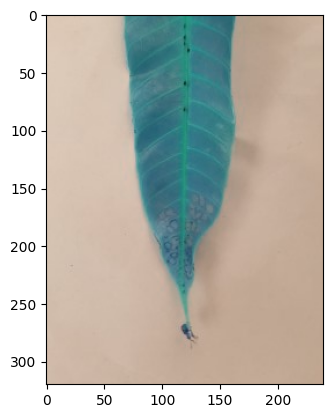

In [ ]:
x=cv2.imread('DMproject/Anthracnose/'+images1[0])
plt.imshow(x)
print(x.shape)

In [5]:
data_path='DMproject'

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True

)


train_ds = datagen.flow_from_directory(
    data_path,
    target_size=(320, 240),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_ds = datagen.flow_from_directory(
    data_path,
    target_size=(320, 240),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_ds = datagen.flow_from_directory(
    data_path,
    target_size=(320, 240),
    batch_size=32,
    class_mode='categorical',
)

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 4000 images belonging to 8 classes.


In [ ]:
batch_size = 32
img_size = (320, 240)

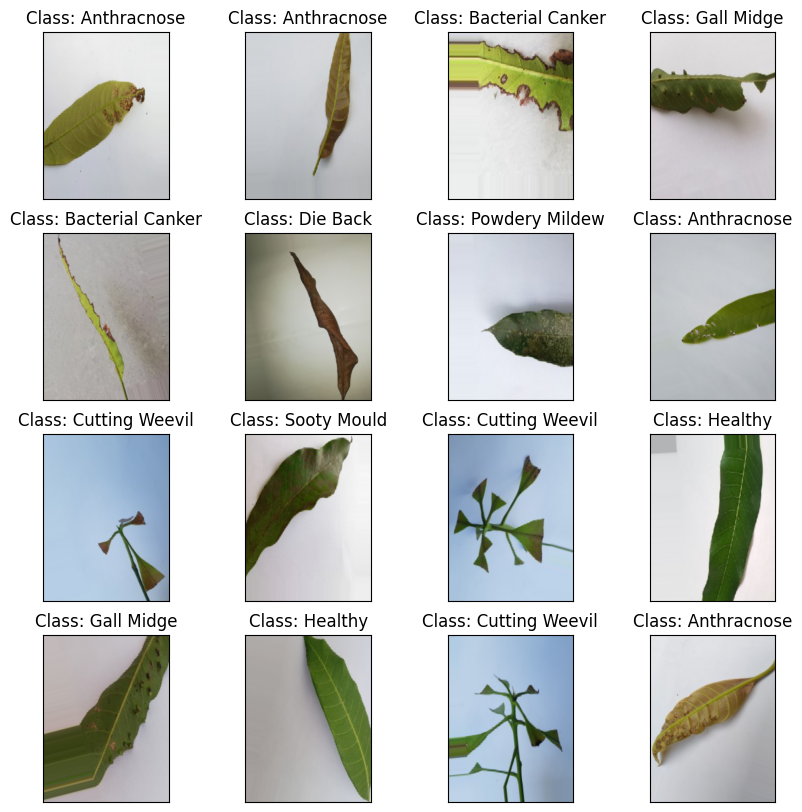

In [13]:
images, labels = next(train_ds)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_title(f"Class: {classes[labels[i].argmax()]}")

plt.show()

In [ ]:
#model 1


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(320,240,3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(8, activation='softmax'))



In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 318, 238, 32)      896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 159, 119, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 157, 117, 64)      18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 78, 58, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 76, 56, 64)        36928     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 38, 28, 64)     

In [ ]:
history=model.fit(train_ds,epochs=4,validation_data=val_ds) 

Epoch 1/4
100/100 [==============================] - 19s 185ms/step - loss: 1.3775 - accuracy: 0.4647 - val_loss: 1.4486 - val_accuracy: 0.4837
Epoch 2/4
100/100 [==============================] - 20s 203ms/step - loss: 0.5353 - accuracy: 0.8159 - val_loss: 0.7543 - val_accuracy: 0.7738
Epoch 3/4
100/100 [==============================] - 20s 200ms/step - loss: 0.3609 - accuracy: 0.8675 - val_loss: 0.5997 - val_accuracy: 0.8012
Epoch 4/4
100/100 [==============================] - 18s 179ms/step - loss: 0.2701 - accuracy: 0.9022 - val_loss: 0.7187 - val_accuracy: 0.7563


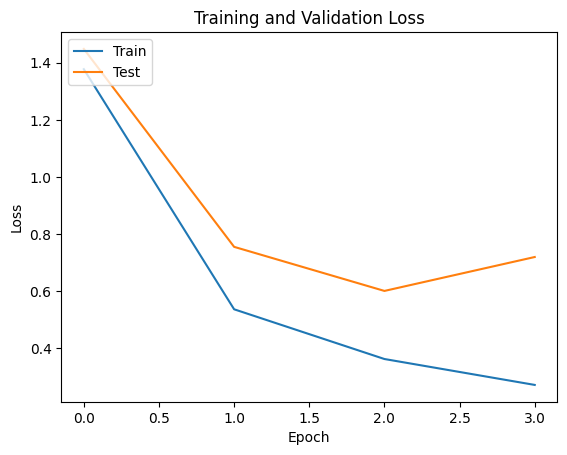

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

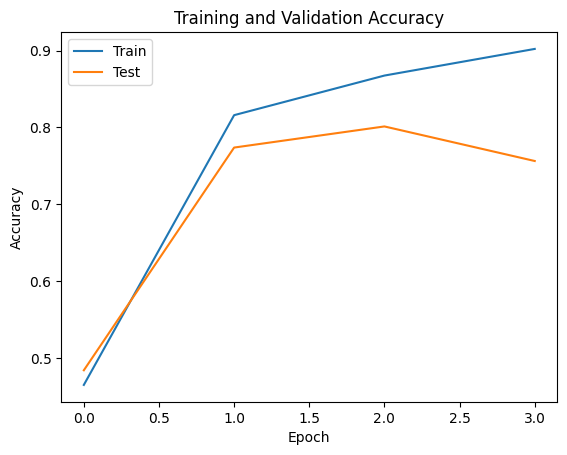

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict(val_ds)
y_actual = val_ds.labels

25/25 [==============================] - 6s 245ms/step


In [ ]:
np.argmax(y_pred,1)


In [ ]:
np.argmax(y_actual,1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_actual, np.argmax(y_pred,1))
accuracy = accuracy_score(y_actual, np.argmax(y_pred,1))
print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy,"%")

Confusion Matrix:
[[ 9  7 14 13 11 11 13 22]
 [ 7 16 13 10  4 12  7 31]
 [10  4 10 16 10 11 11 28]
 [11 11 14 13  4 21  7 19]
 [ 7  7 14 17  7 11  9 28]
 [10 12 11 13  4 15 14 21]
 [15 10  6  8  7 20  8 26]
 [15 10 17  7  8  8  9 26]]
Accuracy: 0.13 %


In [ ]:
#model2 a litte more complex model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(320, 240, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(8, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 318, 238, 32)      896       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 159, 119, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 157, 117, 64)      18496     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 78, 58, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 76, 56, 128)       73856     
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 38, 28, 128)    

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=val_ds) 

Epoch 1/10
100/100 [==============================] - 22s 214ms/step - loss: 1.7696 - accuracy: 0.3028 - val_loss: 1.5309 - val_accuracy: 0.5000
Epoch 2/10
100/100 [==============================] - 19s 192ms/step - loss: 1.0372 - accuracy: 0.5981 - val_loss: 1.2789 - val_accuracy: 0.6475
Epoch 3/10
100/100 [==============================] - 20s 201ms/step - loss: 0.6670 - accuracy: 0.7556 - val_loss: 0.6013 - val_accuracy: 0.7725
Epoch 4/10
100/100 [==============================] - 19s 186ms/step - loss: 0.5471 - accuracy: 0.7944 - val_loss: 0.7328 - val_accuracy: 0.7850
Epoch 5/10
100/100 [==============================] - 18s 182ms/step - loss: 0.3837 - accuracy: 0.8625 - val_loss: 0.6570 - val_accuracy: 0.7738
Epoch 6/10
100/100 [==============================] - 18s 179ms/step - loss: 0.3206 - accuracy: 0.8938 - val_loss: 0.8872 - val_accuracy: 0.7262
Epoch 7/10
100/100 [==============================] - 18s 178ms/step - loss: 0.3545 - accuracy: 0.8781 - val_loss: 0.5403 - val_ac

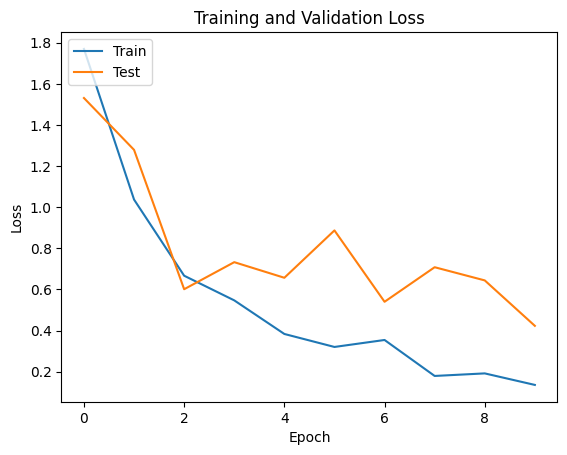

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

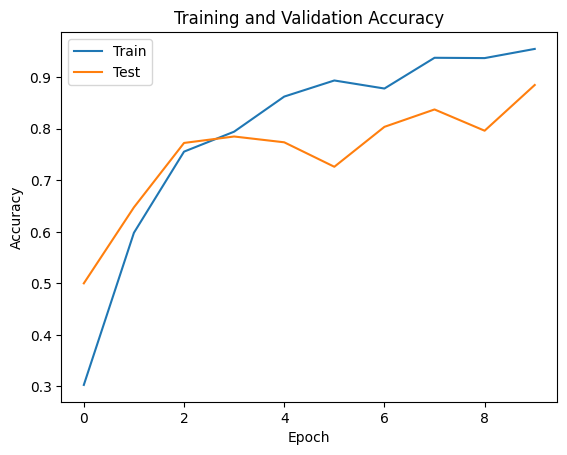

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_actual=val_ds.labels

In [ ]:
y_pred=model.predict(val_ds)

25/25 [==============================] - 4s 167ms/step


In [ ]:
np.argmax(y_pred,1)

array([5, 5, 0, 3, 6, 4, 0, 2, 3, 3, 4, 5, 3, 7, 2, 4, 0, 0, 0, 4, 3, 0,
       6, 0, 6, 0, 6, 4, 4, 5, 0, 4, 2, 4, 2, 3, 6, 2, 3, 2, 4, 6, 0, 4,
       2, 5, 6, 4, 6, 4, 6, 4, 2, 1, 5, 3, 4, 6, 0, 5, 1, 0, 6, 4, 5, 0,
       5, 2, 4, 0, 7, 7, 6, 5, 0, 4, 2, 1, 6, 0, 0, 5, 4, 0, 6, 4, 2, 0,
       1, 2, 7, 4, 2, 0, 4, 0, 1, 7, 0, 1, 0, 2, 3, 7, 4, 2, 5, 4, 6, 3,
       4, 0, 4, 6, 0, 1, 4, 5, 5, 1, 3, 1, 3, 0, 7, 1, 2, 5, 5, 1, 0, 2,
       0, 4, 0, 4, 7, 5, 5, 5, 6, 7, 3, 0, 4, 5, 7, 2, 4, 2, 4, 2, 5, 4,
       4, 1, 0, 1, 0, 3, 4, 4, 4, 1, 4, 4, 5, 2, 5, 5, 0, 6, 1, 5, 5, 5,
       6, 5, 3, 4, 0, 6, 4, 3, 6, 6, 0, 4, 0, 0, 4, 6, 3, 7, 1, 1, 1, 6,
       0, 2, 0, 1, 3, 0, 1, 1, 6, 2, 6, 7, 3, 0, 6, 7, 7, 2, 7, 3, 6, 2,
       4, 3, 6, 2, 4, 4, 6, 0, 2, 4, 3, 6, 2, 0, 4, 4, 7, 6, 0, 3, 2, 2,
       3, 7, 4, 2, 6, 4, 3, 1, 2, 5, 3, 6, 0, 4, 2, 6, 0, 1, 5, 7, 7, 5,
       3, 5, 4, 2, 5, 2, 1, 6, 4, 5, 0, 4, 5, 6, 6, 3, 5, 6, 7, 4, 3, 4,
       6, 4, 0, 1, 2, 2, 3, 5, 4, 4, 0, 7, 5, 4, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_actual, np.argmax(y_pred,1))
print("Confusion Matrix:")
print(cm)
accuracy = accuracy_score(y_actual, np.argmax(y_pred,1))
print("Accuracy:", accuracy,"%")

Confusion Matrix:
[[11 10 11 11 17 12 17 11]
 [14 21  9 10 13  9 11 13]
 [20 14 10 13  9 10 10 14]
 [16 12 19  8 11 16  7 11]
 [ 8  9 17 22  7 10 16 11]
 [13 19 10 14 12  8 12 12]
 [19 11 14 13 10  7 14 12]
 [11 16  8 17  8 16 14 10]]
Accuracy: 0.11125 %


In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(320, 240, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
predictions = tf.keras.layers.Dense(8, activation='softmax')(x)

In [ ]:
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 320, 240, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 320, 240, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 320, 240, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 160, 120, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 160, 120, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 160, 120, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 80, 60, 128)       0   

In [ ]:
history=model.fit(train_ds, validation_data=val_ds, epochs=4)

Epoch 1/4
100/100 [==============================] - 27s 255ms/step - loss: 0.2075 - accuracy: 0.7697 - val_loss: 0.0959 - val_accuracy: 0.8888
Epoch 2/4
100/100 [==============================] - 26s 255ms/step - loss: 0.0333 - accuracy: 0.9825 - val_loss: 0.0870 - val_accuracy: 0.8863
Epoch 3/4
100/100 [==============================] - 25s 249ms/step - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.0791 - val_accuracy: 0.9112
Epoch 4/4
100/100 [==============================] - 25s 246ms/step - loss: 0.0080 - accuracy: 0.9994 - val_loss: 0.0744 - val_accuracy: 0.9137


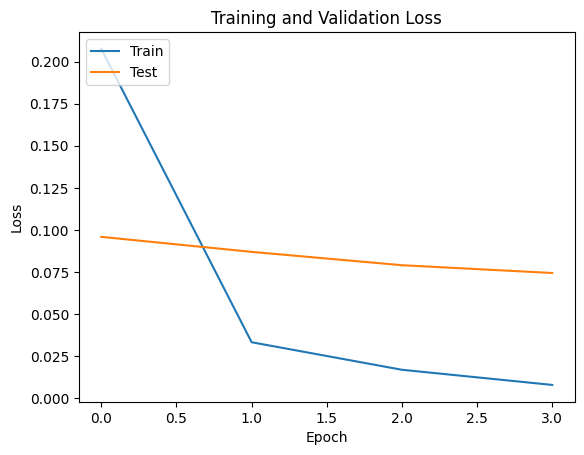

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

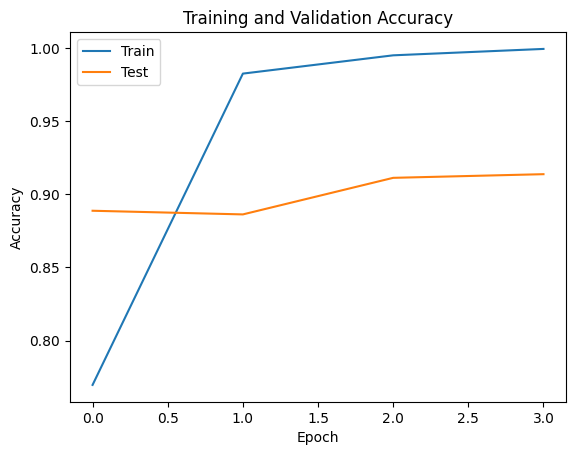

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred=model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_ds.classes
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)
accuracy = accuracy_score(y_actual, np.argmax(y_pred,1))
print("Accuracy:", accuracy,"%")

25/25 [==============================] - 6s 232ms/step
[[14 13 13 13 12 11 19  5]
 [10 14 12 16  8 13 16 11]
 [11 17  9 13 14 19  8  9]
 [10 14 15 14 13 11 10 13]
 [17 18 11 10 10 11 16  7]
 [15 13 12 11 10 14 15 10]
 [12 14 11 14  9 11 13 16]
 [ 7 12 17 11 15 14 15  9]]
Accuracy: 0.12125 %
